In [56]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.cross_validation import  cross_val_score
from sklearn.grid_search import GridSearchCV

In [11]:
iris = load_iris ()
X = iris.data
y = iris.target
print X.shape, y.shape

(150, 4) (150,)


In [16]:
knn_1 = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_1.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [18]:
X_knn_1 = knn_1.kneighbors(X,n_neighbors=5)

## Using Cross Validation

In [21]:
k_range = range(1,50)
k_score = []
for k in k_range:
    knn_2 = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_2.fit(X, y)
    scores = cross_val_score(knn_2,X,y,cv=10,scoring='accuracy')
    k_score.append(scores.mean())
    

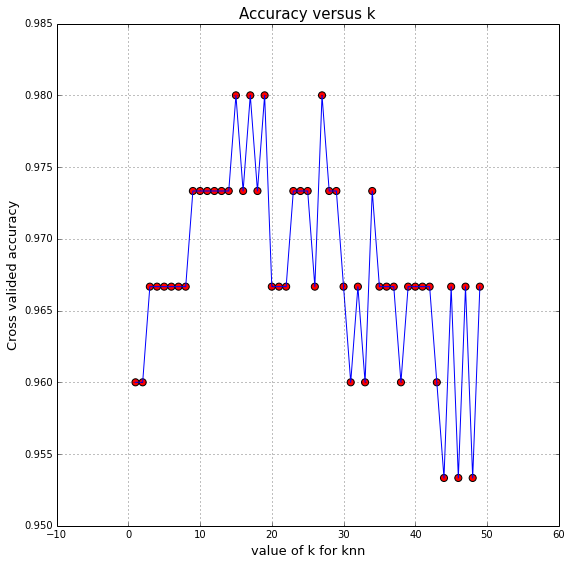

In [26]:
get_ipython().magic(u'matplotlib inline')
plt.figure(figsize=(9,9))
plt.plot(k_range, k_score, 'b-')
plt.scatter(k_range, k_score, c='r',marker='o',s=50)
plt.grid()
plt.xlabel('value of k for knn',fontsize=13)
plt.ylabel('Cross valided accuracy',fontsize=13)
plt.title('Accuracy versus k',fontsize=15)

## Using gridsearchCV

In [48]:
k_range = range(1,50)
par_grid = dict(n_neighbors=k_range)
grid_1 = GridSearchCV(knn_2,par_grid,cv=10,scoring='accuracy')
grid_1.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=49, p=2,
           weights='distance'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [49]:
grid_1.grid_scores_
grid_mean_scores = [result.mean_validation_score for result in grid_1.grid_scores_]
grid_mean_scores

[0.95999999999999996,
 0.95999999999999996,
 0.96666666666666667,
 0.96666666666666667,
 0.96666666666666667,
 0.96666666666666667,
 0.96666666666666667,
 0.96666666666666667,
 0.97333333333333338,
 0.97333333333333338,
 0.97333333333333338,
 0.97333333333333338,
 0.97333333333333338,
 0.97333333333333338,
 0.97999999999999998,
 0.97333333333333338,
 0.97999999999999998,
 0.97333333333333338,
 0.97999999999999998,
 0.96666666666666667,
 0.96666666666666667,
 0.96666666666666667,
 0.97333333333333338,
 0.97333333333333338,
 0.97333333333333338,
 0.96666666666666667,
 0.97999999999999998,
 0.97333333333333338,
 0.97333333333333338,
 0.96666666666666667,
 0.95999999999999996,
 0.96666666666666667,
 0.95999999999999996,
 0.97333333333333338,
 0.96666666666666667,
 0.96666666666666667,
 0.96666666666666667,
 0.95999999999999996,
 0.96666666666666667,
 0.96666666666666667,
 0.96666666666666667,
 0.96666666666666667,
 0.95999999999999996,
 0.95333333333333337,
 0.96666666666666667,
 0.9533333

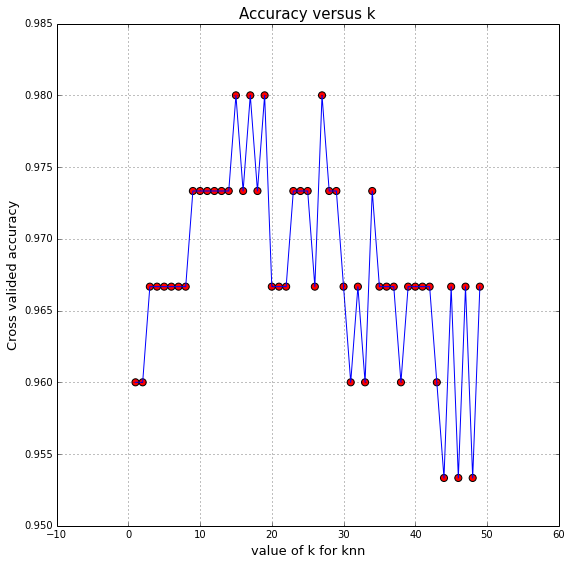

In [50]:
plt.figure(figsize=(9,9))
plt.plot(k_range, grid_mean_scores, 'b-')
plt.scatter(k_range, grid_mean_scores, c='r',marker='o',s=50)
plt.grid()
plt.xlabel('value of k for knn',fontsize=13)
plt.ylabel('Cross valided accuracy',fontsize=13)
plt.title('Accuracy versus k',fontsize=15)

In [51]:
print grid_1.best_score_
print grid_1.best_params_
print grid_1.best_estimator_

0.98
{'n_neighbors': 15}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='distance')


In [52]:
k_range = range(1,50)
weights_opt = ['uniform','distance']
par_grid = dict(n_neighbors=k_range,weights=weights_opt)
grid_2 = GridSearchCV(knn_2,par_grid,cv=10,scoring='accuracy')
grid_2.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=49, p=2,
           weights='distance'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [54]:
grid_2.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, para

In [55]:
print grid_2.best_score_
print grid_2.best_params_
print grid_2.best_estimator_

0.98
{'n_neighbors': 13, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')
